# Week 1

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

### Exercise 1

In [23]:
FILENAME = 'crime.csv'
CATEGORY_COL='Category'
OCCURENCE_COL='Occurences'

In [24]:
data = pd.read_csv(FILENAME)
data

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129520,17050730416710,170507304,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Thursday,06/22/2017,01:42,CENTRAL,"ARREST, CITED",...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,77.0
2129521,17071435504014,170714355,4014,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,09/01/2017,17:00,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,112.0
2129522,17053348465010,170533484,65010,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Friday,06/30/2017,17:50,BAYVIEW,"ARREST, BOOKED",...,NaN,NaN,22.0,NaN,1.0,NaN,NaN,NaN,NaN,56.0
2129523,17102776330130,171027763,30130,OTHER OFFENSES,PEDDLING WITHOUT A LICENSE,Wednesday,12/20/2017,15:41,SOUTHERN,"ARREST, BOOKED",...,3.0,1.0,3.0,7.0,2.0,1.0,1.0,1.0,35.0,21.0


In [3]:
total = data.shape[0]
total

2129525

In [25]:
categories = pd.unique(data[CATEGORY_COL])
categories

array(['ROBBERY', 'VEHICLE THEFT', 'ARSON', 'ASSAULT', 'TRESPASS',
       'BURGLARY', 'LARCENY/THEFT', 'WARRANTS', 'OTHER OFFENSES',
       'DRUG/NARCOTIC', 'SUSPICIOUS OCC', 'LIQUOR LAWS', 'VANDALISM',
       'WEAPON LAWS', 'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES', 'DISORDERLY CONDUCT',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'FORGERY/COUNTERFEITING',
       'PROSTITUTION', 'DRUNKENNESS', 'BAD CHECKS',
       'DRIVING UNDER THE INFLUENCE', 'LOITERING', 'STOLEN PROPERTY',
       'SUICIDE', 'BRIBERY', 'EXTORTION', 'EMBEZZLEMENT', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA'],
      dtype=object)

In [5]:
categories.size

37

In [39]:
# counting total crime per category into a dict
crimesByCategory = {}

for category in categories:
    crimeNo = data[data.Category == category].shape[0]
    crimesByCategory[category] = crimeNo

crimesByCategory

{'ROBBERY': 54467,
 'VEHICLE THEFT': 126228,
 'ARSON': 3875,
 'ASSAULT': 167042,
 'TRESPASS': 19194,
 'BURGLARY': 91067,
 'LARCENY/THEFT': 477975,
 'WARRANTS': 99821,
 'OTHER OFFENSES': 301874,
 'DRUG/NARCOTIC': 117821,
 'SUSPICIOUS OCC': 79087,
 'LIQUOR LAWS': 2840,
 'VANDALISM': 114718,
 'WEAPON LAWS': 21004,
 'NON-CRIMINAL': 236928,
 'MISSING PERSON': 44268,
 'FRAUD': 41348,
 'SEX OFFENSES, FORCIBLE': 8747,
 'SECONDARY CODES': 22378,
 'DISORDERLY CONDUCT': 9932,
 'RECOVERED VEHICLE': 8688,
 'KIDNAPPING': 4282,
 'FORGERY/COUNTERFEITING': 22995,
 'PROSTITUTION': 16501,
 'DRUNKENNESS': 9760,
 'BAD CHECKS': 924,
 'DRIVING UNDER THE INFLUENCE': 5652,
 'LOITERING': 2402,
 'STOLEN PROPERTY': 11450,
 'SUICIDE': 1291,
 'BRIBERY': 796,
 'EXTORTION': 729,
 'EMBEZZLEMENT': 2984,
 'GAMBLING': 343,
 'PORNOGRAPHY/OBSCENE MAT': 57,
 'SEX OFFENSES, NON FORCIBLE': 43,
 'TREA': 14}

### Exercise 2

In [34]:
# converting dictionary to DataFrame to be able to order it
categorizedDf = pd.DataFrame(crimesByCategory.items(), columns=[CATEGORY_COL, OCCURENCE_COL])
categorizedDf.sort_values(by=[OCCURENCE_COL], ascending=False, inplace=True)
categorizedDf

,Category,Occurences
6,LARCENY/THEFT,477975
8,OTHER OFFENSES,301874
14,NON-CRIMINAL,236928
3,ASSAULT,167042
1,VEHICLE THEFT,126228
9,DRUG/NARCOTIC,117821
12,VANDALISM,114718
7,WARRANTS,99821
5,BURGLARY,91067
10,SUSPICIOUS OCC,79087


<AxesSubplot:title={'center':'Crime occurences by category'}, xlabel='Category'>

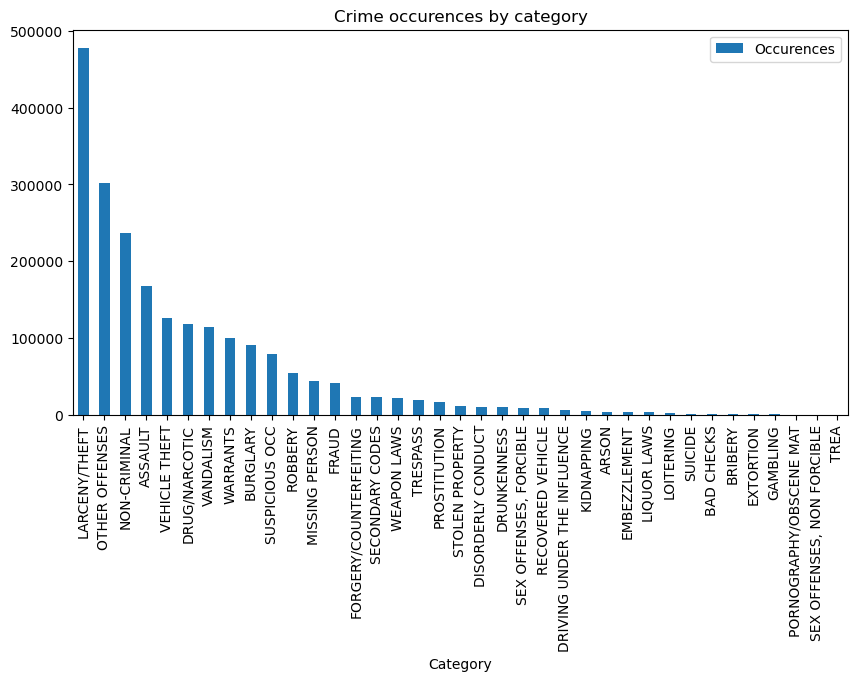

In [35]:
title = "Crime occurences by category"
categorizedDf.plot.bar(x=CATEGORY_COL, y=OCCURENCE_COL, figsize=(10,5), title=title)

In [21]:
#categories = list(crimesByCategory.keys())
#values = list(crimesByCategory.values())
#plt.figure(figsize=(10, 5))
#plt.bar(names, values, align='center', width=0.7)
#plt.xticks(rotation='vertical')
#plt.xlabel("Categories")
#plt.ylabel("Occurrences")
#plt.title("Number of crimes per category")
#plt.show()

### Exercise 3

In [36]:
# counting crimes per year
noOfCrimesPerYear = {}
for year in range(2003,2018):
    data['Date'] = pd.to_datetime(data['Date'])
    count = data[data['Date'].dt.year == year].shape[0]
    noOfCrimesPerYear[year] = count

{2003: 142803,
 2004: 142054,
 2005: 137048,
 2006: 131856,
 2007: 131771,
 2008: 135242,
 2009: 134309,
 2010: 127758,
 2011: 126713,
 2012: 135464,
 2013: 147664,
 2014: 144844,
 2015: 151459,
 2016: 145994,
 2017: 149487}

In [37]:
# converting to dataframe to display 
yearlyCrimesDf = pd.DataFrame(noOfCrimesPerYear.items(), columns=['Year', 'Occurences'])
yearlyCrimesDf

,Year,Occurences
0,2003,142803
1,2004,142054
2,2005,137048
3,2006,131856
4,2007,131771
5,2008,135242
6,2009,134309
7,2010,127758
8,2011,126713
9,2012,135464


<AxesSubplot:title={'center':'Crimes per year'}, xlabel='Year'>

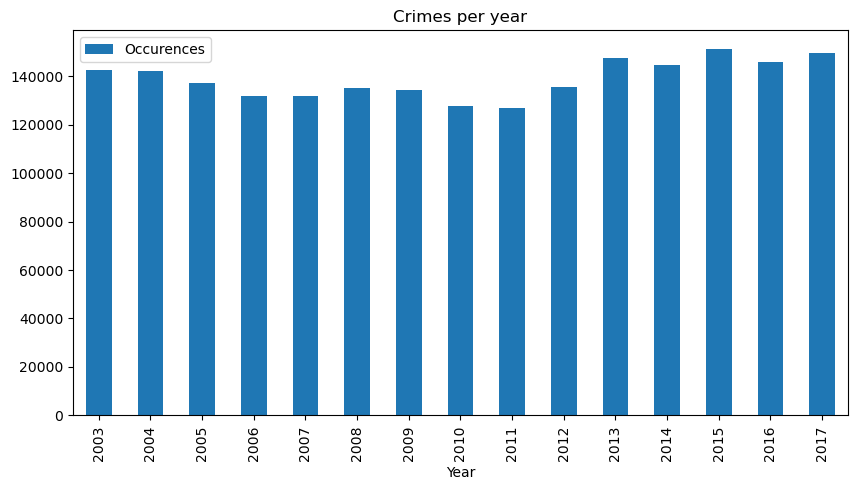

In [43]:
yearlyCrimesDf.plot.bar(x='Year', y='Occurences', figsize=(10,5), title='Crimes per year')

In [44]:
# get years with the most/least crime
mostCrime = yearlyCrimesDf.iloc[yearlyCrimesDf['Occurences'].idxmax()]
leastCrime = yearlyCrimesDf.iloc[yearlyCrimesDf['Occurences'].idxmin()]
mostCrime

Year            2015
Occurences    151459
Name: 12, dtype: int64

In [45]:
leastCrime

Year            2011
Occurences    126713
Name: 8, dtype: int64

In [46]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [56]:
categorizedYearly = {}
for category in focuscrimes:
    dict = {}
    for year in range(2003, 2018):
        print(year)
        temp = data.loc[data['Date'].dt.year == year]
        count = temp.loc[data['Category'] == category].shape[0]
        print(count)
        dict[year] = count
    df = pd.DataFrame(dict.items(), columns=['Year', 'Occurences'])
    categorizedYearly[category] = df
categorizedYearly

2003
15276
2004
17816
2005
18103
2006
7263
2007
6444
2008
6042
2009
5170
2010
4336
2011
4743
2012
6174
2013
6234
2014
7101
2015
7935
2016
6417
2017
5705
2003
776
2004
628
2005
528
2006
552
2007
505
2008
490
2009
640
2010
649
2011
748
2012
878
2013
1171
2014
1058
2015
927
2016
861
2017
782
2003
877
2004
808
2005
680
2006
510
2007
570
2008
778
2009
948
2010
815
2011
752
2012
699
2013
459
2014
343
2015
547
2016
657
2017
395
2003
6377
2004
6427
2005
6963
2006
7599
2007
7452
2008
7234
2009
7510
2010
7743
2011
7077
2012
7704
2013
6833
2014
7102
2015
7636
2016
8557
2017
9719
2003
26185
2004
24337
2005
25226
2006
27227
2007
25599
2008
25636
2009
25419
2010
24212
2011
25629
2012
30760
2013
36216
2014
37860
2015
41980
2016
40365
2017
47714
2003
11409
2004
10968
2005
10154
2006
10779
2007
10900
2008
11063
2009
10681
2010
10659
2011
10589
2012
10519
2013
10790
2014
10398
2015
11090
2016
11546
2017
11613
2003
3113
2004
3297
2005
3490
2006
4031
2007
3928
2008
4150
2009
3508
2010
3232
2011
3218
2012


{'VEHICLE THEFT':     Year  Occurences
 0   2003       15276
 1   2004       17816
 2   2005       18103
 3   2006        7263
 4   2007        6444
 5   2008        6042
 6   2009        5170
 7   2010        4336
 8   2011        4743
 9   2012        6174
 10  2013        6234
 11  2014        7101
 12  2015        7935
 13  2016        6417
 14  2017        5705,
 'STOLEN PROPERTY':     Year  Occurences
 0   2003         776
 1   2004         628
 2   2005         528
 3   2006         552
 4   2007         505
 5   2008         490
 6   2009         640
 7   2010         649
 8   2011         748
 9   2012         878
 10  2013        1171
 11  2014        1058
 12  2015         927
 13  2016         861
 14  2017         782,
 'DISORDERLY CONDUCT':     Year  Occurences
 0   2003         877
 1   2004         808
 2   2005         680
 3   2006         510
 4   2007         570
 5   2008         778
 6   2009         948
 7   2010         815
 8   2011         752
 9   2012       

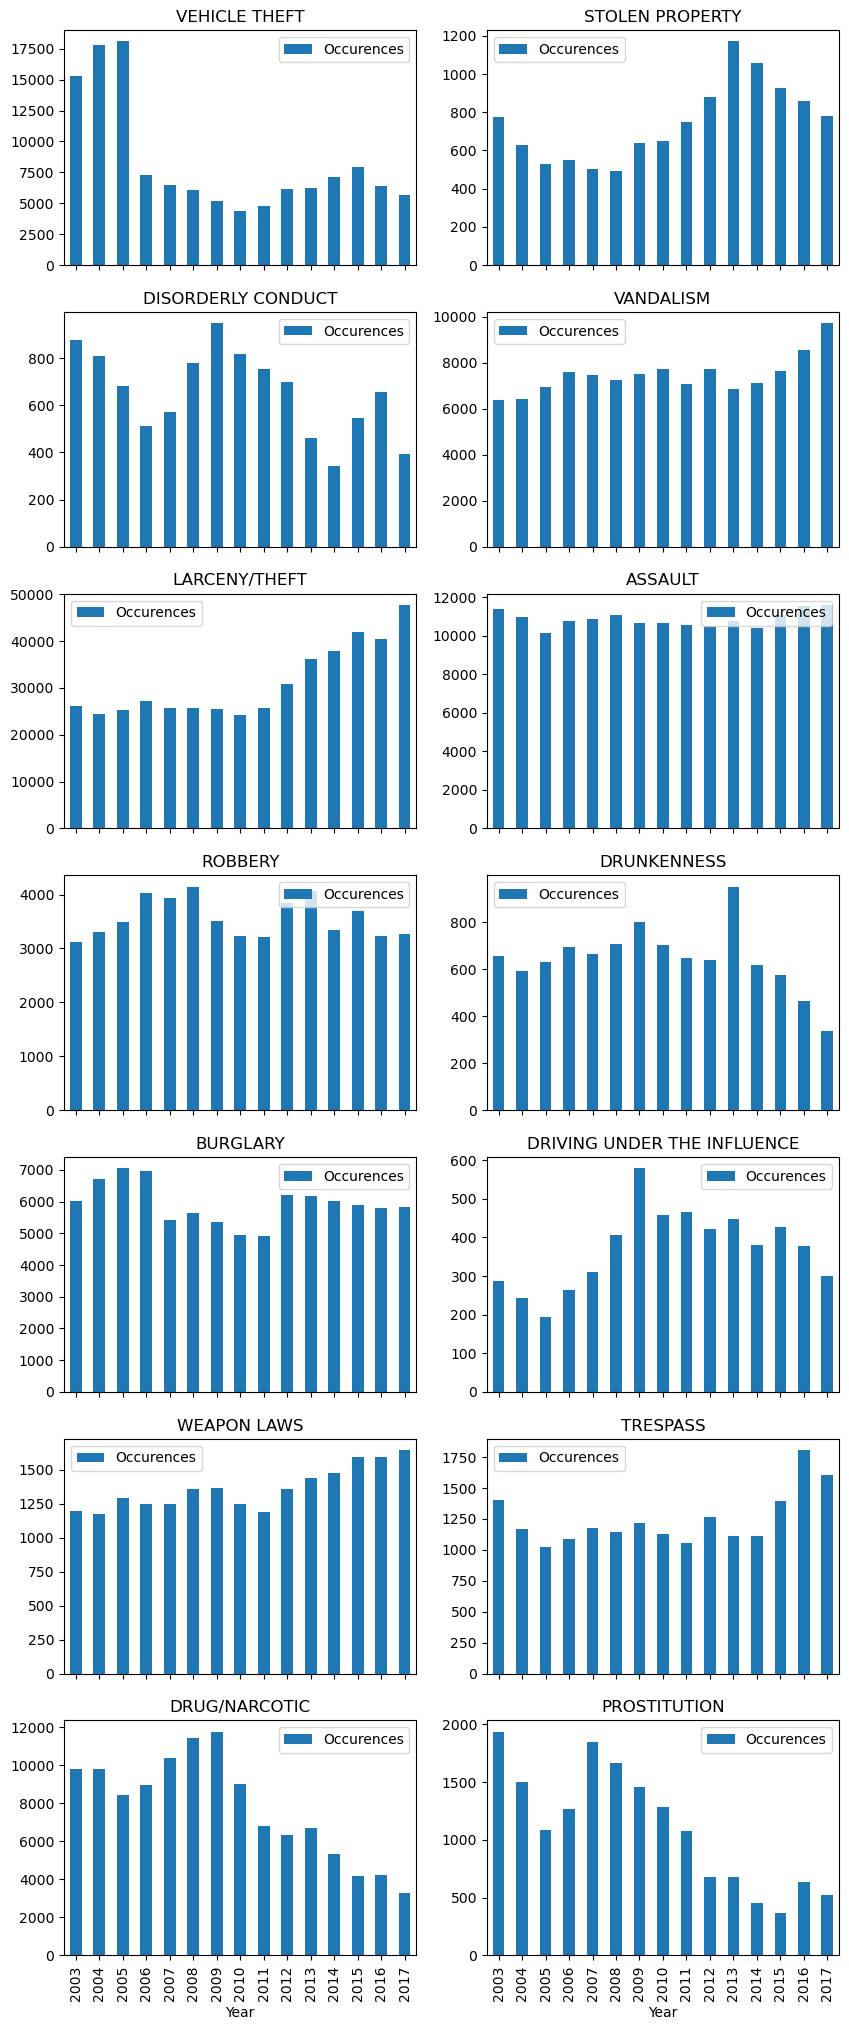

In [66]:
fig, axes = plt.subplots(nrows=7, ncols=2, sharex=True)
i = 0
for crime, df in categorizedYearly.items():
    df.plot.bar(ax=axes[i//2, i%2], x='Year', y='Occurences', title=crime, figsize=(10,25))
    i += 1